# Context
## Hr Data Analytics
## This dataset contains information about employees who worked in a company.

# Content
## This dataset contains columns: Satisfactory Level, Number of Project, Average Monthly Hours, Time Spend Company, Promotion Last 5
## Years, Department, Salary

# Inspiration
## Answer the following questions would be worthy
## 1- Do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
## 2- Plot bar charts showing the impact of employee salaries on retention
## 3- Plot bar charts showing a correlation between department and employee retention
## 4- Now build a logistic regression model using variables that were narrowed down in step 1
## 5- Measure the accuracy of the model

[Link](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\HR\\HR_comma_sep.csv')

In [3]:
((df[df.left==0].shape[0])/(df.shape[0]))*100

76.19174611640777

In [4]:
#% of levels in class left

In [5]:
df[df.left==0].shape[0]

11428

In [6]:
df[df.left==1].shape[0]

3571

In [7]:
df.shape[0]

14999

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [12]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# EDA:

In [13]:
for i in df.columns:
    print(i)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [14]:
for i in df:
    print(i,':\n')
    print(df[i].value_counts(),'\n')
    

satisfaction_level :

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64 

last_evaluation :

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64 

number_project :

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64 

average_montly_hours :

135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64 

time_spend_company :

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64 

Work_accident :

0    12830
1     2169
Name: Work_accident, dtype: int64 

left :

0    11428
1     3571
Name: left, dtype: i

In [15]:
catigorical=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','Department','salary']
continious=list(set(df)-set(catigorical))

In [16]:
catigorical

['number_project',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [17]:
continious

['last_evaluation', 'satisfaction_level', 'average_montly_hours']

# counts:

----------------------------------------------------------------------------------------------------------------
" NUMBER_PROJECT " :

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64


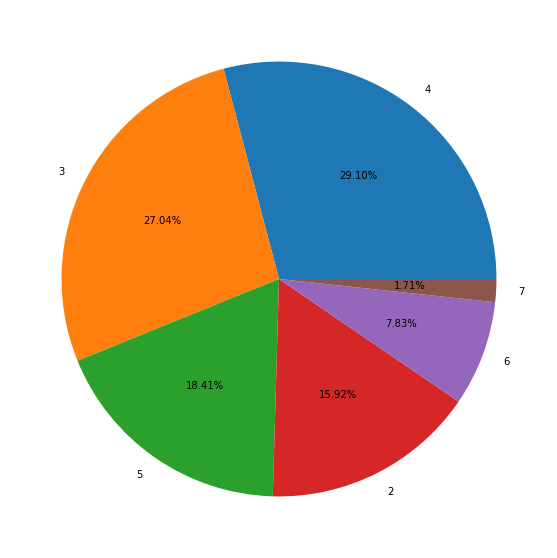

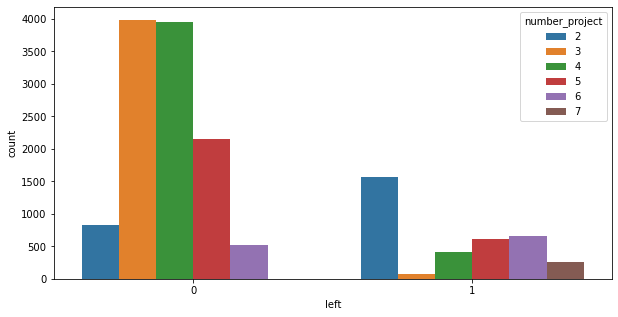

----------------------------------------------------------------------------------------------------------------
" TIME_SPEND_COMPANY " :

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64


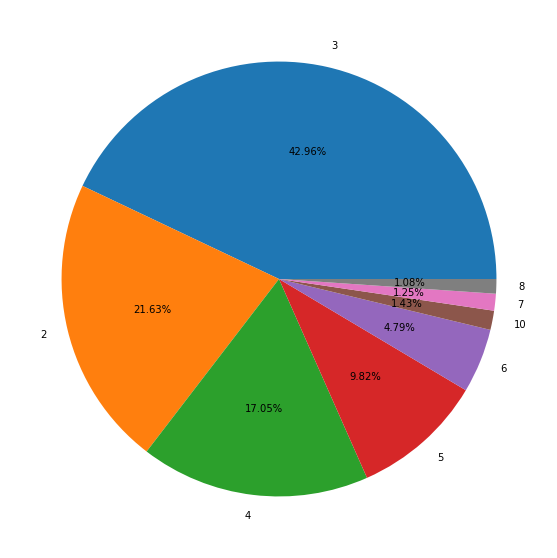

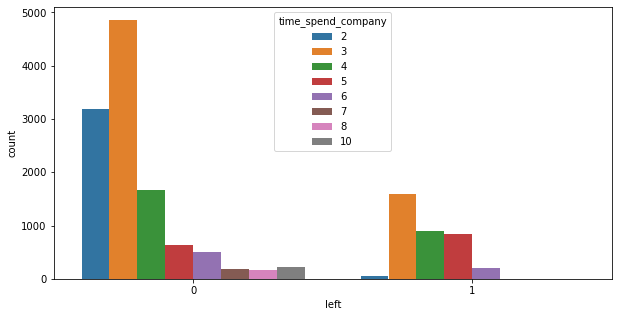

----------------------------------------------------------------------------------------------------------------
" WORK_ACCIDENT " :

0    12830
1     2169
Name: Work_accident, dtype: int64


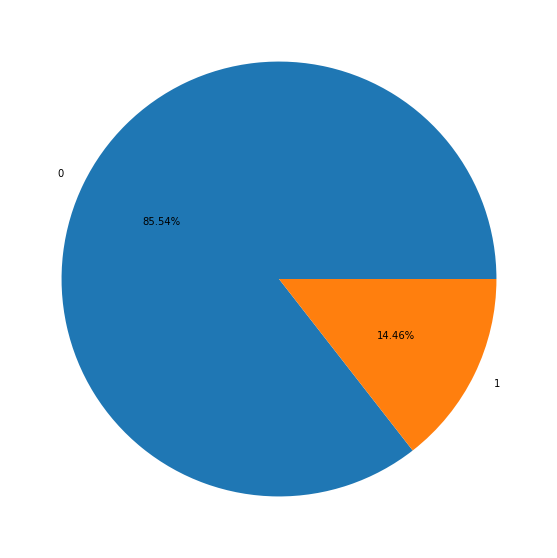

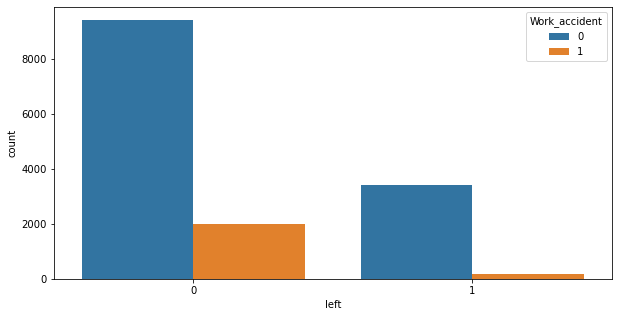

----------------------------------------------------------------------------------------------------------------
" LEFT " :

0    11428
1     3571
Name: left, dtype: int64


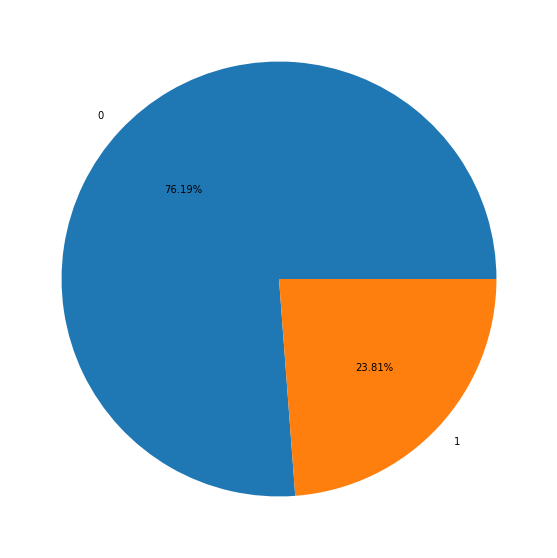

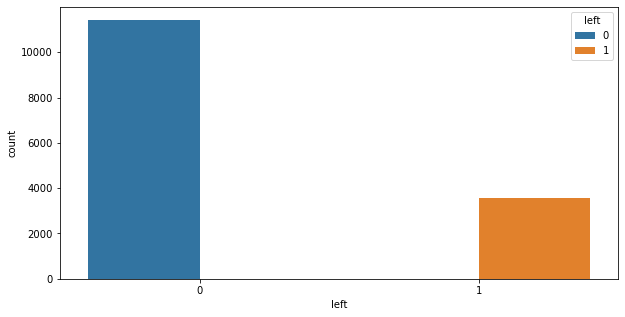

----------------------------------------------------------------------------------------------------------------
" PROMOTION_LAST_5YEARS " :

0    14680
1      319
Name: promotion_last_5years, dtype: int64


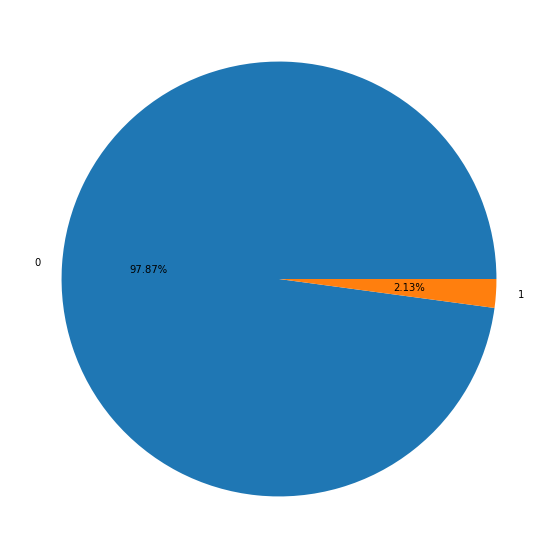

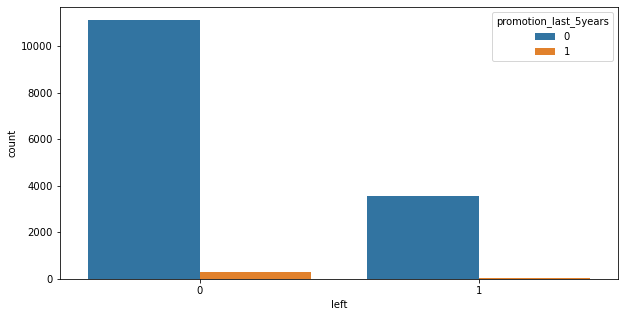

----------------------------------------------------------------------------------------------------------------
" DEPARTMENT " :

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64


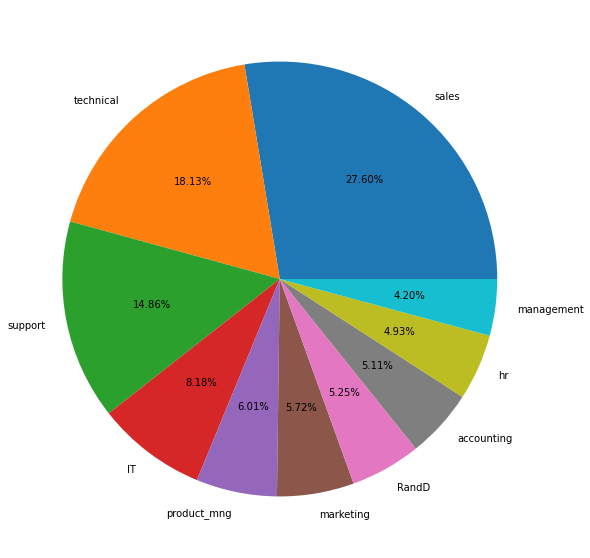

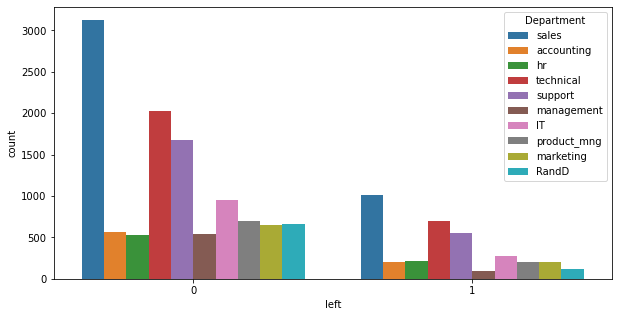

----------------------------------------------------------------------------------------------------------------
" SALARY " :

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


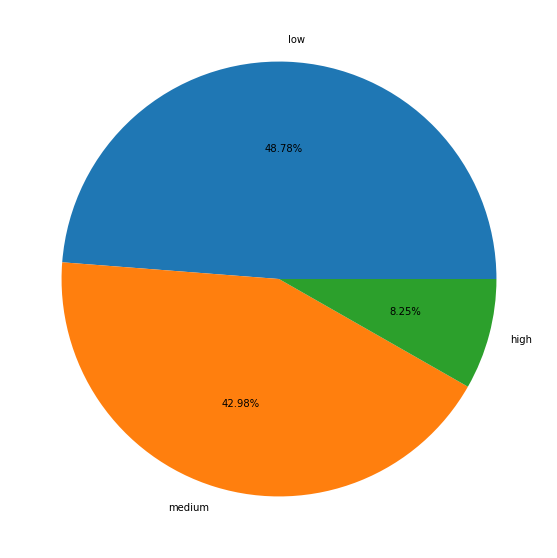

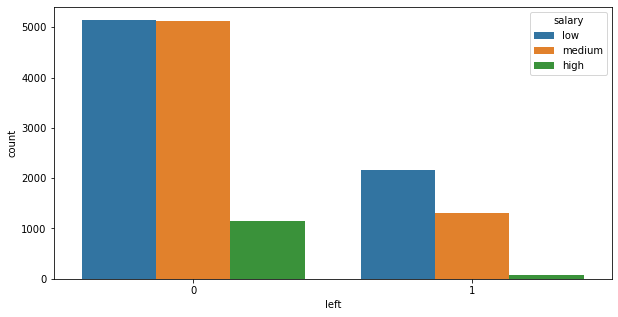

In [18]:
for i in catigorical:
    print('----------------------------------------------------------------------------------------------------------------')
    print('"',i.upper(),'"',':\n')
    print(df[i].value_counts())
    plt.figure(figsize=(10,10))
    plt.pie(df[i].value_counts().values, labels=df[i].value_counts().index, autopct='%1.2f%%')
    plt.show()
    plt.figure(figsize=(10,5))
    sns.countplot(hue=df[i],x=df['left'])
    plt.show()

# From the above pie charts and countplots below are inferences:

## 1.NUMBER_PROJECT :
## Majorly only 29.1% of employees take  four projects,15.92% of employees take least number of projects ie two and only 1.7% of employees take highest number of projects ie 7
## but we see that no employee will continue to work once they complete 7 projects and maximum employees start resigning the company once they complete 6 projects.
## Also employees with minimum number of projects leave the company as they might be on project contract basis and only few get retained by the company.
## 2.TIME_SPEND_COMPANY:
## Majorly only 42.91% of employee spend three years in the company,21.6% of employees spend only 2 years and 1.4% of employees spend 10 years
## majority of employees leave the company after 3 years
## Employees completing 5 years of stay tend to decide of staying or resigning but Majority of them resign from the company so we can conclude that  5year can be the threshold for retention of the employees hence employers should take care of employees once they complete 5 years of experience. 
## 3.Work_Accidenet:
## Majorly 85.6% of employees dont face any work accidents but remaining 14.4% of employees face work accidents
## Employees without work accidens during their employement tend to leave the company when compaired to Employees with work accidens 
## 4.Left:
## Majorly 76.2% of employees dont leave the company but remaining 23.8% of employees leave the company
## 5.Promotion_last_5yers:
## Majorly 97.8% of employees dont get promotions but 2.2% of employees get promotion
## Majority of employees leaving the company do not get promotion in last 5 years
## 6.Department:
## Majorly 27.6% of employees are from sales and minorly 4.2% of employees are from management
## Majority of employees leaving the company are from sales department
## 7.SALARY :Majorly 48.7% of employees get low salary and minorly 8.25% of employees get high salary
## Majority of employees leaving the company fall under low salary bracket


<AxesSubplot:>

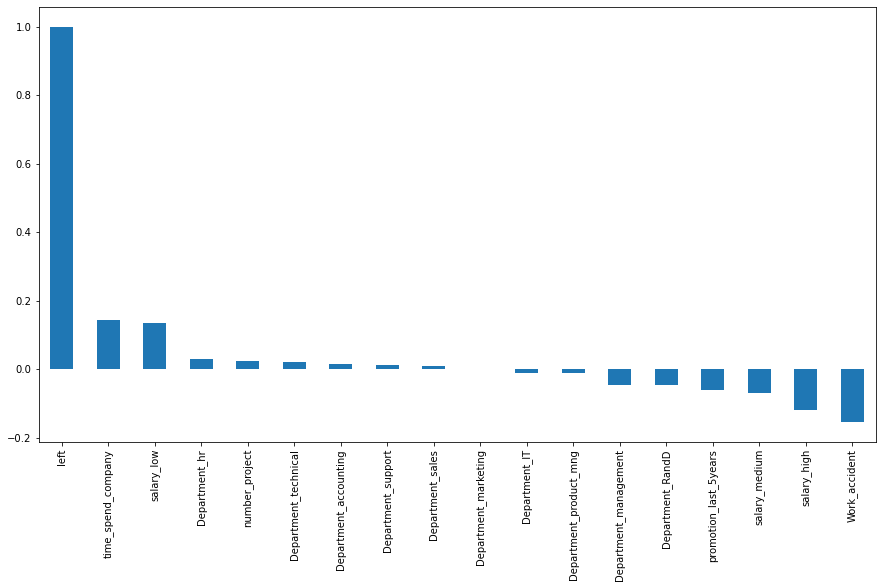

In [19]:
df_dummies = pd.get_dummies(df[catigorical])
plt.figure(figsize=(15,8))
df_dummies.corr()['left'].sort_values(ascending = False).plot(kind='bar')

## Employees with low salary are positively corelated with employees leaving the company 
## Employees with medium and high salary are Negatively corelated with employees leaving the company
## Experience is positively corelated with employees leaving the company
## Work Accident is Negatively corelated
## Employeed with promotions are negatively corelated with employees leaving the company



In [20]:
df_dummies

,number_project,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,6,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


<AxesSubplot:>

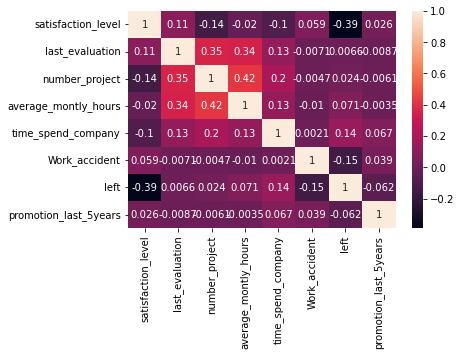

In [21]:
sns.heatmap(df.corr(), annot=True)

last_evaluation:


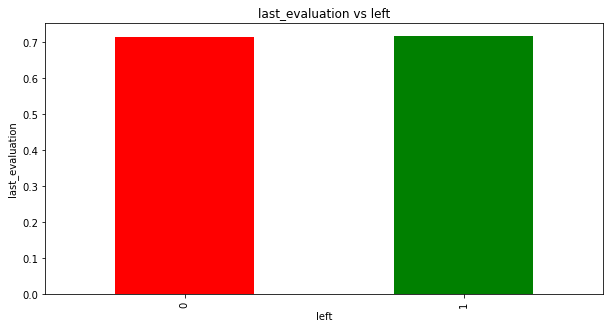

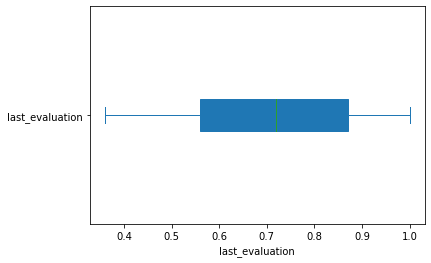

satisfaction_level:


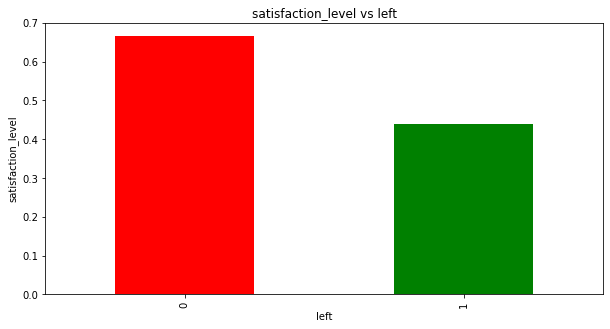

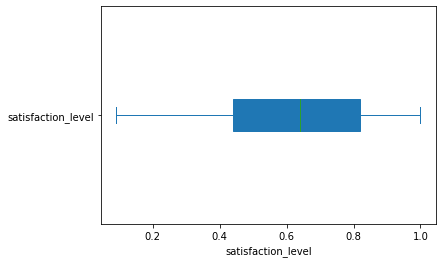

average_montly_hours:


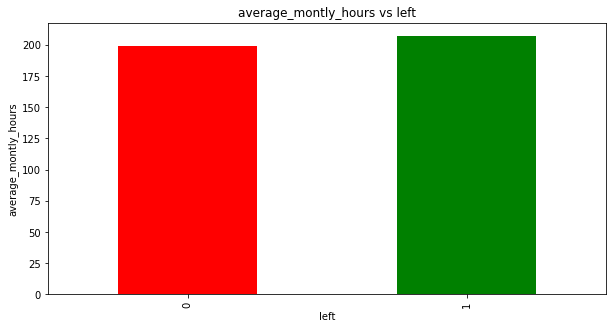

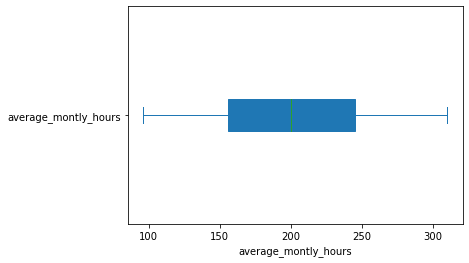

In [22]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(10,5))
    df.groupby('left')[i].mean().plot(kind='bar',color=['red','green','blue','black','yellow'])
    plt.ylabel(i)
    plt.title(i+' vs left')
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

## On an average last_evaluation is 0.7 for both leaving the company and not leaving
## On an average satisfaction_level is 0.68 for  leaving the company and 0.45 for not leaving
## On an average average_montly_hours is 200 for both leaving the company and not leaving


-----------------------------------------------------------------------------------------------------------------
last_evaluation:


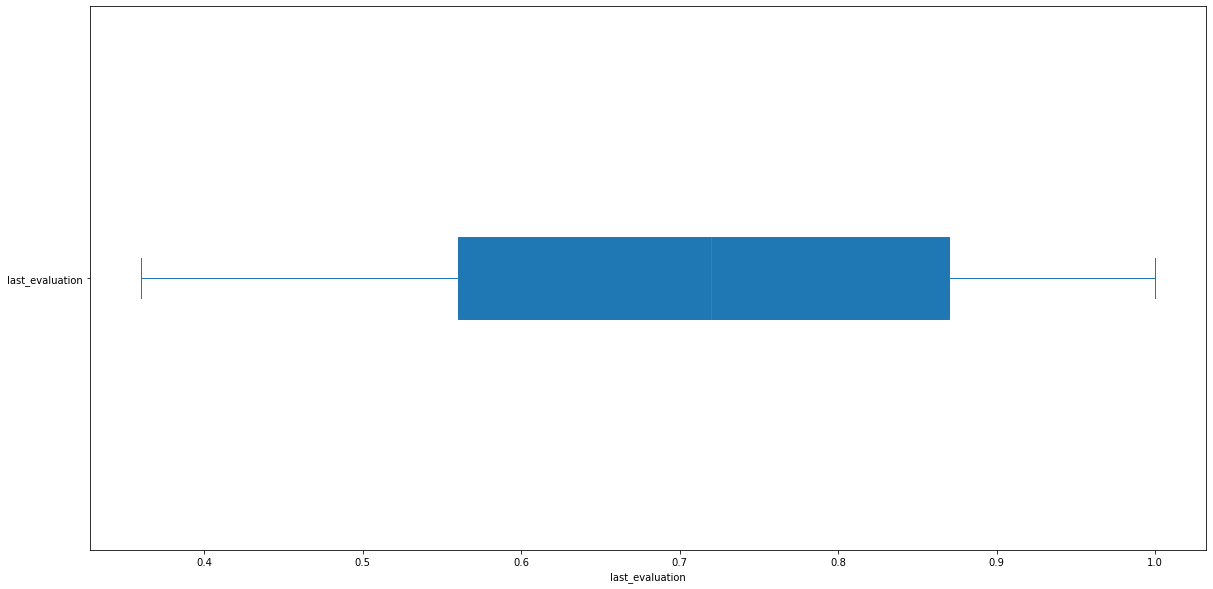

left limit:0.09500000000000014
right limit:1.335
iqr:0.30999999999999994
The total number of records are:14999
The number of outliers are: 0
The total percentage of outliers are: 0.0 %
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
-----------------------------------------------------------------------------------------------------------------
satisfaction_level:


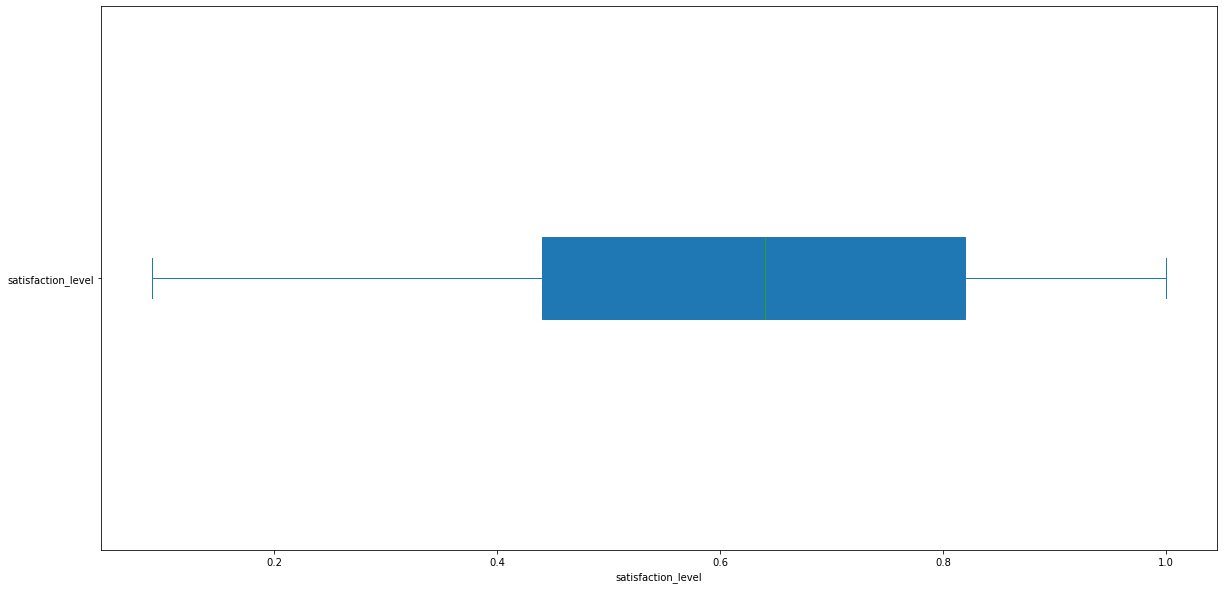

left limit:-0.12999999999999995
right limit:1.39
iqr:0.37999999999999995
The total number of records are:14999
The number of outliers are: 0
The total percentage of outliers are: 0.0 %
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
-----------------------------------------------------------------------------------------------------------------
average_montly_hours:


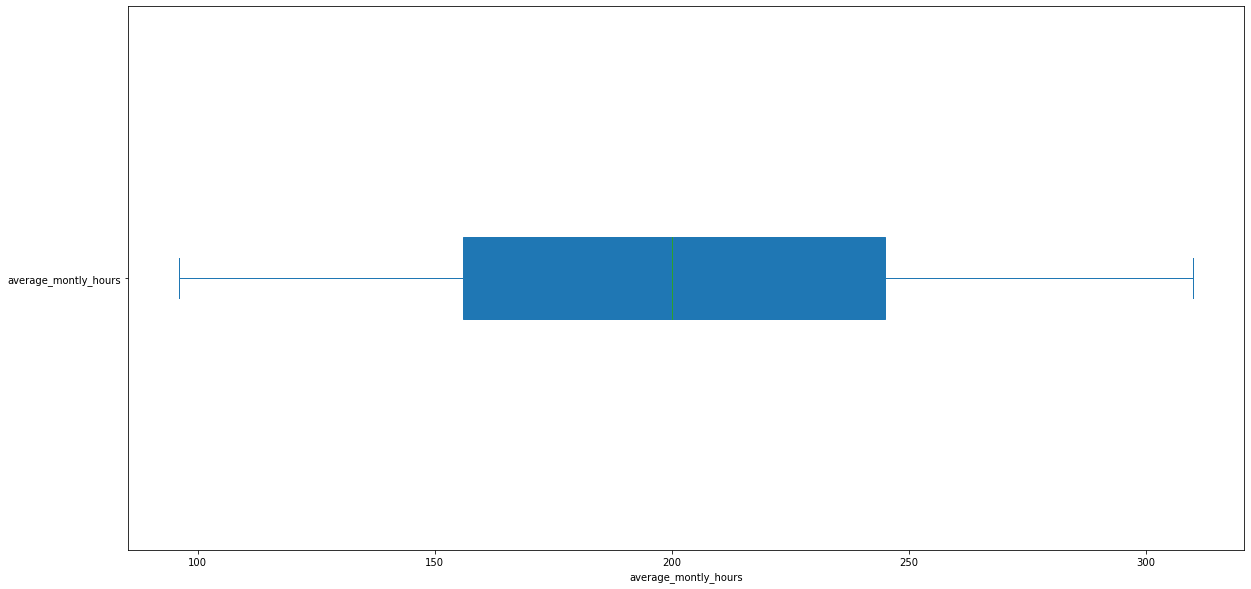

left limit:22.5
right limit:378.5
iqr:89.0
The total number of records are:14999
The number of outliers are: 0
The total percentage of outliers are: 0.0 %
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


In [23]:
for i in continious:
    print('-----------------------------------------------------------------------------------------------------------------')
    print(i+":")
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= df[i].describe()['75%']-df[i].describe()['25%']
    right_lim=df[i].quantile(0.75)+1.5*iqr
    leftt_lim=df[i].quantile(0.25)-1.5*iqr
    total=len(df[i])
    outlier=len(df[i][(df[i]<leftt_lim)|(df[i]>right_lim)])
    per=outlier/total
    print("left limit:{}".format(leftt_lim))
    print("right limit:{}".format(right_lim))
    print("iqr:{}".format(iqr))
    print('The total number of records are:{}'.format(len(df[i])))
    print('The number of outliers are:',len(df[i][(df[i]<leftt_lim)|(df[i]>right_lim)]))
    print('The total percentage of outliers are:',per*100,'%')

    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'")
    a=a.lower()
    if a=='left':
        lo=float(input('by what number do you want to replace'))
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=float(input('by what number do you want to replace'))
        ro=float(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='no':
        pass
    if a=='left' or a=='right' or a=='both':
        plt.figure(figsize=(20,10))
        df[i].plot.box(vert=False,patch_artist=True)
        plt.xlabel(i)
        plt.show()

# Feature Engineering:

## catigorical variables:

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import colorama
from colorama import Fore

for i in catigorical:
    if i !='left':
        print("-------------------------------------------------------------------------------------------------------------")
        print(i+":")
        a=np.array(pd.crosstab(df.left,df[i]))
        (stats,p,dof,_)=chi2_contingency(a,correction=False)
        if p>0.05:
            print(Fore.RED +"'{}' is a 'bad Predictor'".format(i))
            print("p_val = {}\n".format(p))
            #df.drop([i],1,inplace=True)
        else:
            print(Fore.GREEN +"'{}' is a 'Good Predictor'".format(i))
            print("p_val = {}\n".format(p))

-------------------------------------------------------------------------------------------------------------
number_project:
'number_project' is a 'Good Predictor'
p_val = 0.0

-------------------------------------------------------------------------------------------------------------
time_spend_company:
'time_spend_company' is a 'Good Predictor'
p_val = 0.0

-------------------------------------------------------------------------------------------------------------
Work_accident:
'Work_accident' is a 'Good Predictor'
p_val = 5.698672551670881e-80

-------------------------------------------------------------------------------------------------------------
promotion_last_5years:
'promotion_last_5years' is a 'Good Predictor'
p_val = 3.813122551070949e-14

-------------------------------------------------------------------------------------------------------------
Department:
'Department' is a 'Good Predictor'
p_val = 7.042130463822568e-15

--------------------------------------------

## Continious varibles:

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf
import colorama
from colorama import Fore

for i in continious:
    print("-------------------------------------------------------------------------------------------------------------------")
    print(i+":\n")
    print('ANOVA:\n')
    mod=ols(i+'~left',data=df).fit()
    aov_table=smf.stats.anova_lm(mod,type = 2)
    print(aov_table,'\n')
    print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
        print('Avg of this feature is same for both left group and not left group\n')
        print("p_val = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.RED +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both left group and not left group\n')
        print('we need to perform Tuckey as atleast one category is different\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.left,alpha=0.05)
        print(tukey,'\n')
        

-------------------------------------------------------------------------------------------------------------------
last_evaluation:

ANOVA:

               df      sum_sq   mean_sq         F   PR(>F)
left          1.0    0.018951  0.018951  0.646805  0.42127
Residual  14997.0  439.405418  0.029300       NaN      NaN 

Pvalue=0.4212701963759524

'last_evaluation' is a 'bad Predictor'

Avg of this feature is same for both left group and not left group

p_val = 0.4212701963759524

-------------------------------------------------------------------------------------------------------------------
satisfaction_level:

ANOVA:

               df      sum_sq     mean_sq            F  PR(>F)
left          1.0  139.844432  139.844432  2663.881285     0.0
Residual  14997.0  787.289943    0.052496          NaN     NaN 

Pvalue=0.0

TUKEY:

'satisfaction_level' is a 'good Predictor'

Avg of this feature is not same for both left group and not left group

we need to perform Tuckey as atleast one cat

In [26]:
df.drop(['last_evaluation'],1,inplace=True)
continious.remove('last_evaluation')

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_7460\1084253902.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['last_evaluation'],1,inplace=True)


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.loc[:,continious]

vif_data = pd.DataFrame()

vif_data['features'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,features,VIF
0,satisfaction_level,5.141511
1,average_montly_hours,5.141511


# Machine Learning Preprocessing:

In [28]:
df

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,2,157,3,0,1,0,sales,low
1,0.80,5,262,6,0,1,0,sales,medium
2,0.11,7,272,4,0,1,0,sales,medium
3,0.72,5,223,5,0,1,0,sales,low
4,0.37,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,1,0,support,low
14995,0.37,2,160,3,0,1,0,support,low
14996,0.37,2,143,3,0,1,0,support,low
14997,0.11,6,280,4,0,1,0,support,low


In [29]:
for i in df.loc[:,catigorical]:
    if (df[i].dtype=='O'):
        df_i = pd.get_dummies(df[i], drop_first=True, prefix =i)
        df = pd.concat([df,df_i], axis=1)
        del df[i]
df

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [30]:
x = df.iloc[:, df.columns != 'left']

In [31]:
y = df.iloc[:, df.columns == 'left']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

# Machine Learning:

# 1. Model(logistic):

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression(random_state=123, solver='liblinear')
logmodel.fit(x_train,y_train)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=123, solver='liblinear')

In [36]:
predictions1 = logmodel.predict(x_train)

In [37]:
from sklearn.metrics import confusion_matrix


In [38]:
confusion_matrix(y_train,predictions1)

array([[7418,  573],
       [1525,  983]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_train,predictions1)#train


0.8001714448995142

In [41]:
predictions2 = logmodel.predict(x_test)

In [42]:
confusion_matrix(y_test,predictions2)

array([[3171,  266],
       [ 668,  395]], dtype=int64)

In [43]:
Logi_accuracy=accuracy_score(y_test,predictions2)#test
Logi_accuracy

0.7924444444444444

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_train,predictions1))#train

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7991
           1       0.63      0.39      0.48      2508

    accuracy                           0.80     10499
   macro avg       0.73      0.66      0.68     10499
weighted avg       0.78      0.80      0.78     10499



In [46]:
print(classification_report(y_test,predictions2))#test

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3437
           1       0.60      0.37      0.46      1063

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500



In [47]:
y_pred_te1_proba = logmodel.predict_proba(x_test)

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_te1_proba[:,1])

In [50]:
auc= roc_auc_score(y_test,y_pred_te1_proba[:,1])

In [51]:
auc

0.8132178158608755

(0.0, 1.0)

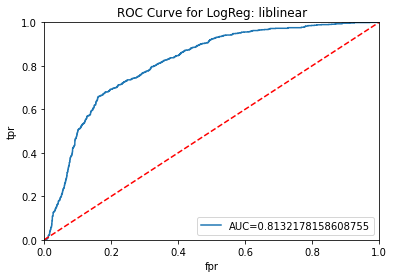

In [52]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

# Model(logistic) without test and train split:

In [53]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='liblinear')

In [55]:
from sklearn.model_selection import cross_val_score 

In [56]:
cross_val_score(lr, x, y.squeeze(), cv=skfold).mean()

0.7722436812270757

In [57]:
len(x_train)

10499

In [58]:
len(y_train)

10499

In [59]:
len(x_test)

4500

In [60]:
len(y_test)

4500

In [61]:
model1 = lr.fit(x_train,y_train.squeeze())

In [62]:
y_pred_tr1 = model1.predict(x_train)

In [63]:
y_pred_te1 = model1.predict(x_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,y_pred_te1))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3437
           1       0.60      0.37      0.46      1063

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500



In [66]:
y_pred_te1_proba = model1.predict_proba(x_test)

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_te1_proba[:,1])

In [69]:
auc= roc_auc_score(y_test,y_pred_te1_proba[:,1])

In [70]:
auc

0.8132178158608755

(0.0, 1.0)

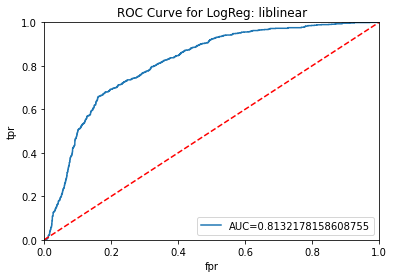

In [71]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

# SMOTE:

In [72]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE(random_state=123)

In [75]:
xr, yr= sm.fit_resample(x,y)

In [76]:
#xr, yr= sm.fit_resample(x_train,y_train)

In [77]:
logmodel_smot = LogisticRegression(random_state=123, solver='liblinear')

In [78]:
model4 = logmodel_smot.fit(xr,yr)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
y_pred_sm = model4.predict(x_test)

In [80]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3437
           1       0.49      0.75      0.59      1063

    accuracy                           0.76      4500
   macro avg       0.70      0.75      0.71      4500
weighted avg       0.81      0.76      0.77      4500



In [81]:
len(y_train)

10499

In [82]:
len(yr)

22856

In [83]:
predictions1_smot = model4.predict(xr)

In [84]:
confusion_matrix(yr,predictions1_smot)

array([[8700, 2728],
       [2199, 9229]], dtype=int64)

In [85]:
accuracy_score(yr,predictions1_smot)#train


0.7844329716485824

In [86]:
predictions2_smot = model4.predict(x_test)

In [87]:
confusion_matrix(y_test,predictions2_smot)

array([[2607,  830],
       [ 268,  795]], dtype=int64)

In [88]:
Logi_accuracy_smote=accuracy_score(y_test,predictions2_smot)#test
Logi_accuracy_smote

0.756

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(yr,predictions1_smot))#train

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     11428
           1       0.77      0.81      0.79     11428

    accuracy                           0.78     22856
   macro avg       0.79      0.78      0.78     22856
weighted avg       0.79      0.78      0.78     22856



In [91]:
print(classification_report(y_test,predictions2_smot))#test

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3437
           1       0.49      0.75      0.59      1063

    accuracy                           0.76      4500
   macro avg       0.70      0.75      0.71      4500
weighted avg       0.81      0.76      0.77      4500



In [92]:
y_pred_te1_proba_smot = model4.predict_proba(x_test)

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_te1_proba_smot[:,1])

In [95]:
auc= roc_auc_score(y_test,y_pred_te1_proba_smot[:,1])

In [96]:
auc

0.8099902532645816

(0.0, 1.0)

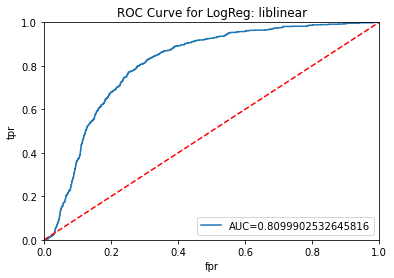

In [97]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

# SMOTE with test and train split(best model in logistic regression):

In [98]:
x_train_smot,x_test_smot,y_train_smot,y_test_smot=train_test_split(xr,yr,test_size=0.3,random_state=24)

In [99]:
model5 = logmodel_smot.fit(x_train_smot,y_train_smot)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
y_pred_sm_1 = model5.predict(x_test_smot)

In [101]:
print(classification_report(y_test_smot,y_pred_sm_1))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      3461
           1       0.77      0.81      0.79      3396

    accuracy                           0.79      6857
   macro avg       0.79      0.79      0.79      6857
weighted avg       0.79      0.79      0.79      6857



In [102]:
len(y_train_smot)

15999

In [103]:
len(x_train_smot)

15999

In [104]:
len(y_test_smot)

6857

In [105]:
len(x_test_smot)

6857

In [106]:
predictions2_smot = model5.predict(x_train_smot)

In [107]:
len(predictions2_smot)

15999

In [108]:
confusion_matrix(y_train_smot,predictions2_smot)

array([[6051, 1916],
       [1518, 6514]], dtype=int64)

In [109]:
accuracy_score(y_train_smot,predictions2_smot)#train


0.7853615850990687

In [110]:
predictions3_smot = model5.predict(x_test_smot)

In [111]:
confusion_matrix(y_test_smot,predictions3_smot)

array([[2653,  808],
       [ 649, 2747]], dtype=int64)

In [112]:
accuracy_score(y_test_smot,predictions3_smot)#test


0.787516406591804

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_train_smot,predictions2_smot))#train

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7967
           1       0.77      0.81      0.79      8032

    accuracy                           0.79     15999
   macro avg       0.79      0.79      0.79     15999
weighted avg       0.79      0.79      0.79     15999



In [115]:
print(classification_report(y_test_smot,predictions3_smot))#test

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      3461
           1       0.77      0.81      0.79      3396

    accuracy                           0.79      6857
   macro avg       0.79      0.79      0.79      6857
weighted avg       0.79      0.79      0.79      6857



In [116]:
y_pred_te1_proba_smot = model5.predict_proba(x_test_smot)

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

In [118]:
(fpr, tpr, thresholds) = roc_curve(y_test_smot,y_pred_te1_proba_smot[:,1])

In [119]:
auc= roc_auc_score(y_test_smot,y_pred_te1_proba_smot[:,1])

In [120]:
auc

0.8449100000034031

(0.0, 1.0)

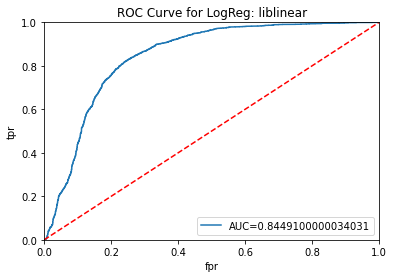

In [121]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

# 2. Model(Decision Tree):

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=123)

In [123]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [124]:
predict1=dt.predict(x_train)

In [125]:
dt.score(x_train,y_train)

0.9999047528336032

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
accuracy_score(y_train,predict1)

0.9999047528336032

In [128]:
predict2=dt.predict(x_test)

In [129]:
dt.score(x_test,y_test)

0.9704444444444444

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test,predict2)

0.9704444444444444

In [132]:
depth=[1,2,3,4,5,6,7,8,9,10]
acc_test=[]
acc_train=[]

In [133]:
for i in depth:
    model_bestfit=DecisionTreeClassifier(max_depth=i)
    model_bestfit.fit(x_train,y_train)
    predict_bestfit_train=model_bestfit.predict(x_train)
    predict_bestfit_test=model_bestfit.predict(x_test)
    acc_train.append(accuracy_score(y_train,predict_bestfit_train))
    acc_test.append(accuracy_score(y_test,predict_bestfit_test))

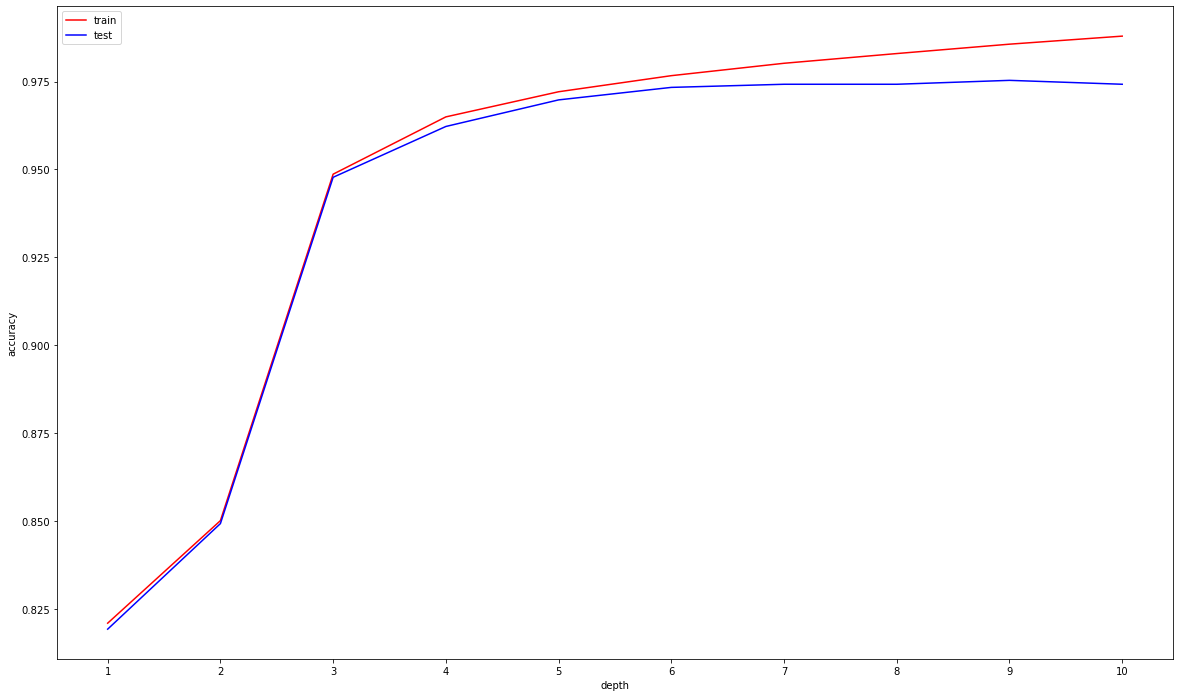

In [134]:
plt.figure(figsize=(20,12))
plt.plot(depth,acc_train,'red')
plt.plot(depth,acc_test,'blue')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1, 11, step=1))
plt.legend(['train','test'])
plt.show()

In [135]:
final1=DecisionTreeClassifier(max_depth=3)

# depth-4:

In [136]:
final1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [137]:
final1_predict1=dt.predict(x_train)

In [138]:
final1.score(x_train,y_train)

0.948661777312125

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(y_train,final1_predict1)

0.9999047528336032

In [141]:
final1_predict2=dt.predict(x_test)

In [142]:
final1.score(x_test,y_test)

0.9477777777777778

In [143]:
decci_accuracy=accuracy_score(y_test,final1_predict2)
decci_accuracy

0.9704444444444444

In [144]:
print(classification_report(y_train,final1_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7991
           1       1.00      1.00      1.00      2508

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [145]:
print(classification_report(y_test,final1_predict2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3437
           1       0.92      0.95      0.94      1063

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



# 2. Model(Decision Tree)with smot data(best):

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=123)

In [147]:
dt.fit(x_train_smot,y_train_smot)

DecisionTreeClassifier(random_state=123)

In [148]:
predict1=dt.predict(x_train_smot)

In [149]:
dt.score(x_train_smot,y_train_smot)

0.9999374960935058

In [150]:
from sklearn.metrics import accuracy_score

In [151]:
accuracy_score(y_train_smot,predict1)

0.9999374960935058

In [152]:
predict2=dt.predict(x_test_smot)

In [153]:
dt.score(x_test_smot,y_test_smot)

0.9680618346215546

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
accuracy_score(y_test_smot,predict2)

0.9680618346215546

In [156]:
depth=[1,2,3,4,5,6,7,8,9,10]
acc_test=[]
acc_train=[]

In [157]:
for i in depth:
    model_bestfit=DecisionTreeClassifier(max_depth=i)
    model_bestfit.fit(x_train_smot,y_train_smot)
    predict_bestfit_train=model_bestfit.predict(x_train_smot)
    predict_bestfit_test=model_bestfit.predict(x_test_smot)
    acc_train.append(accuracy_score(y_train_smot,predict_bestfit_train))
    acc_test.append(accuracy_score(y_test_smot,predict_bestfit_test))

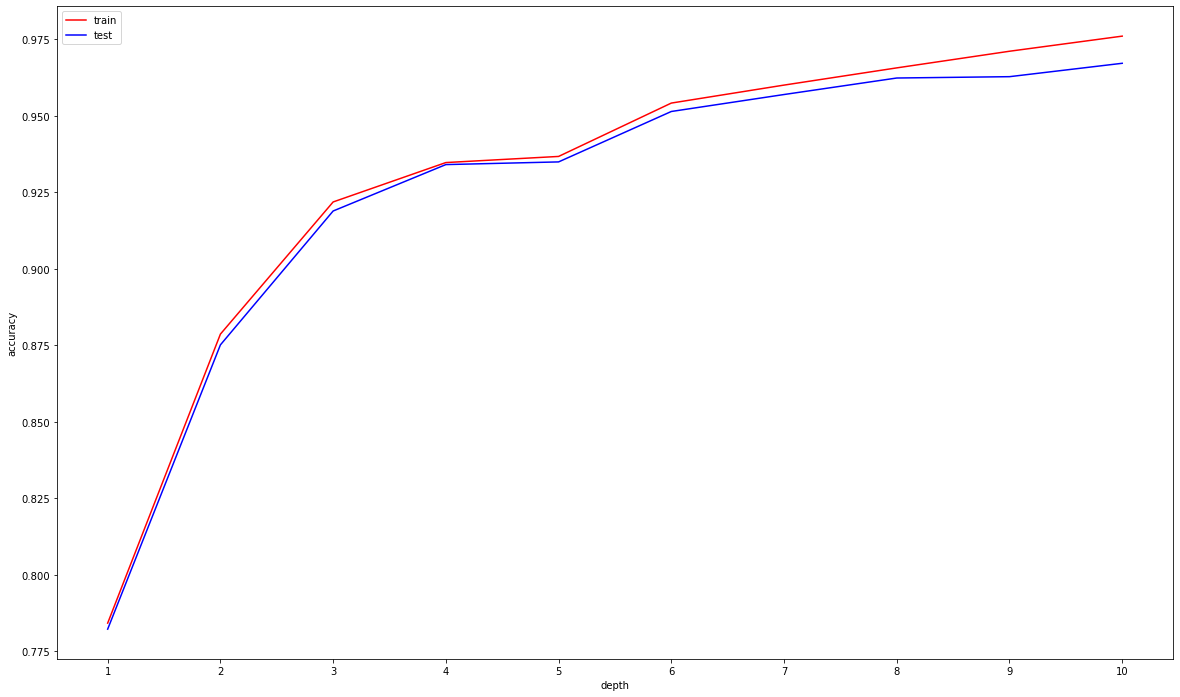

In [158]:
plt.figure(figsize=(20,12))
plt.plot(depth,acc_train,'red')
plt.plot(depth,acc_test,'blue')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1, 11, step=1))
plt.legend(['train','test'])
plt.show()

In [159]:
final1=DecisionTreeClassifier(max_depth=8)

# depth-8:

In [160]:
final1.fit(x_train_smot,y_train_smot)

DecisionTreeClassifier(max_depth=8)

In [161]:
final1_predict1=dt.predict(x_train_smot)

In [162]:
final1.score(x_train_smot,y_train_smot)

0.9656853553347085

In [163]:
from sklearn.metrics import accuracy_score

In [164]:
accuracy_score(y_train_smot,final1_predict1)

0.9999374960935058

In [165]:
final1_predict2=dt.predict(x_test_smot)

In [166]:
final1.score(x_test_smot,y_test_smot)

0.9625200525010937

In [167]:
decci_accuracy_smote=accuracy_score(y_test_smot,final1_predict2)
decci_accuracy_smote

0.9680618346215546

In [168]:
print(classification_report(y_train_smot,final1_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7967
           1       1.00      1.00      1.00      8032

    accuracy                           1.00     15999
   macro avg       1.00      1.00      1.00     15999
weighted avg       1.00      1.00      1.00     15999



In [169]:
print(classification_report(y_test_smot,final1_predict2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3461
           1       0.96      0.97      0.97      3396

    accuracy                           0.97      6857
   macro avg       0.97      0.97      0.97      6857
weighted avg       0.97      0.97      0.97      6857



# 3.Model (RandomForest):

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
params = {'n_estimators': [50,150,250], 'max_features': ['sqrt', 0.25,0.5,0.75,1], 'min_samples_split': [2,4,6], 'max_depth': [2,3,5]}

In [172]:
rfc = RandomForestClassifier(random_state= 1, oob_score=True)

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
clf = RandomizedSearchCV(rfc, params, cv = 5, n_iter = 10)

In [175]:
model = clf.fit(x,y)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

In [176]:
from pprint import pprint

In [177]:
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.75,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [178]:
rfc1 = RandomForestClassifier(random_state=1, max_depth=3, max_features=0.75, n_estimators=50, oob_score=True)

In [179]:
model2 = rfc1.fit(x,y)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_7460\1656574101.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2 = rfc1.fit(x,y)


In [180]:
y_pred = model2.predict(x)

In [181]:
model2.score(x,y)

0.9637309153943596

In [182]:
model2.oob_score_

0.9553970264684313

In [183]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, scoring='accuracy', cv = 5).mean()

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.9605971546070913

In [184]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11428
           1       0.93      0.91      0.92      3571

    accuracy                           0.96     14999
   macro avg       0.95      0.95      0.95     14999
weighted avg       0.96      0.96      0.96     14999



In [185]:
rf_accuracy= accuracy_score(y,y_pred)
rf_accuracy

0.9637309153943596

# 4. AdaBoost(smote)

In [186]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 6)

In [188]:
y_test=y_test.iloc[:,0]

In [189]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier()

In [190]:
Ada_Model = Ada.fit(xr, yr)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [191]:
Ada_Pred = Ada_Model.predict(x_test)

In [192]:
Ada_Pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
# confusion_matrix

pd.crosstab(y_test, Ada_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2648,205,2853
1,51,846,897
All,2699,1051,3750


In [194]:
confusion_matrix(y_test, Ada_Pred)

array([[2648,  205],
       [  51,  846]], dtype=int64)

In [195]:
# classification_report

print(classification_report(y_test, Ada_Pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2853
           1       0.80      0.94      0.87       897

    accuracy                           0.93      3750
   macro avg       0.89      0.94      0.91      3750
weighted avg       0.94      0.93      0.93      3750



In [196]:
# accuracy_score

Ada_accuracy = accuracy_score(y_test, Ada_Pred)
Ada_accuracy

0.9317333333333333

In [197]:
# define array of actual classes

actual = np.repeat([1, 0], repeats = [9156, 9113])

In [198]:
# define array of predicted classes

pred = np.repeat([1, 0, 1, 0], repeats = [7928, 1228, 1094, 8019])

In [199]:
# claculate F1 score

f1_score(actual, pred)

0.8722631752668061

In [200]:
# AUC

y_predict = Ada_Model.predict_proba(x)
y_predict[:, 1]
plt.show()

In [201]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate
# fpr = False Positive Rate

fpr, tpr, thresholds = roc_curve(y, y_predict[:, 1])
roc_auc = auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.978


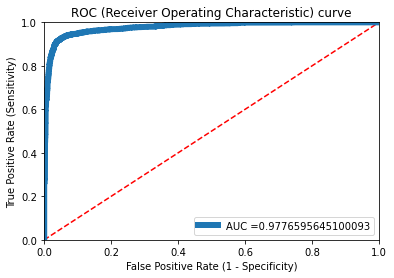

In [202]:
# ROC Curve

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()

# 5. Naïve Bayes(smote)

In [203]:
from sklearn.naive_bayes import GaussianNB

In [204]:
NB = GaussianNB()

In [205]:
NB_Model = NB.fit(xr, yr)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
NB_Pred = NB_Model.predict(x_test)

In [207]:
NB_Pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [208]:
# confusion_matrix

pd.crosstab(y_test, NB_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1133,1720,2853
1,136,761,897
All,1269,2481,3750


In [209]:
confusion_matrix(y_test, NB_Pred)

array([[1133, 1720],
       [ 136,  761]], dtype=int64)

In [210]:
# classification_report

print(classification_report(y_test, NB_Pred))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55      2853
           1       0.31      0.85      0.45       897

    accuracy                           0.51      3750
   macro avg       0.60      0.62      0.50      3750
weighted avg       0.75      0.51      0.53      3750



In [211]:
# accuracy_score

NB_accuracy = accuracy_score(y_test, NB_Pred)
NB_accuracy

0.5050666666666667

In [212]:
# define array of actual classes

actual = np.repeat([1, 0], repeats = [9156, 9113])

In [213]:
Pred = np.repeat([1, 0, 1, 0], repeats = [7217, 1939, 2162, 6951])

In [214]:
f1_score(actual, pred)

0.8722631752668061

In [215]:
# AUC

y_predict = NB_Model.predict_proba(x)
y_predict[:, 1]
plt.show()

In [216]:
#ROC Curve - Receiver Operating Characteristic curve
### threshold
#tpr = True Positive Rate 
#fpr = False Positive Rate

from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.776


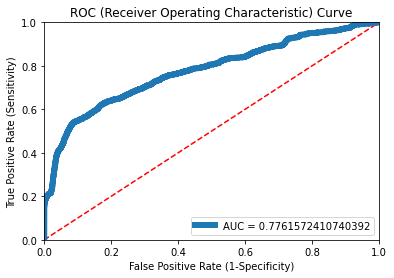

In [217]:
# ROC Curve

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

# 6. KNN(smote)

In [218]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN_Model = KNN.fit(xr, yr)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [219]:
KNN_Pred = KNN_Model.predict(x_test)
KNN_Pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [220]:
# confusion_matrix

pd.crosstab(y_test, KNN_Pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2672,181,2853
1,11,886,897
All,2683,1067,3750


In [221]:
confusion_matrix(y_test, KNN_Pred)

array([[2672,  181],
       [  11,  886]], dtype=int64)

In [222]:
# classification_report

print(classification_report(y_test,KNN_Pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2853
           1       0.83      0.99      0.90       897

    accuracy                           0.95      3750
   macro avg       0.91      0.96      0.93      3750
weighted avg       0.96      0.95      0.95      3750



In [223]:
# accuracy_score

KNN_accuracy = accuracy_score(y_test, KNN_Pred)
KNN_accuracy

0.9488

In [224]:
# define array of actual classes

actual = np.repeat([1, 0], repeats = [9156, 9113])

In [225]:
# define array of predicted classes

pred = np.repeat([1, 0, 1, 0], repeats = [7418, 1738, 198, 8915])

In [226]:
# calculate F1 score

f1_score(actual, pred)

0.8845695206296208

In [227]:
# AUC

y_predict = KNN_Model.predict_proba(x)
y_predict[:,1]
plt.show()

In [228]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate

from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.998


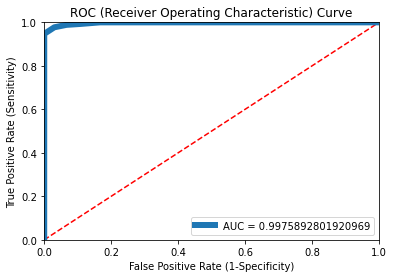

In [229]:
# ROC Curve

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

# 7. SVM(smote)

In [230]:
from sklearn.svm import SVC

SVC = SVC(kernel = "linear", C = 1, gamma = 'auto', probability = True)

In [231]:
SVC_Model = SVC.fit(xr, yr)

C:\Users\MASHKOOR KHADER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [232]:
SVC_Pred = SVC_Model.predict(x_test)
SVC_Pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [233]:
# confusion_matrix

pd.crosstab(y_test, SVC_Pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2000,853,2853
1,171,726,897
All,2171,1579,3750


In [234]:
confusion_matrix(y_test, SVC_Pred)

array([[2000,  853],
       [ 171,  726]], dtype=int64)

In [235]:
# classification_report

print(classification_report(y_test, SVC_Pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      2853
           1       0.46      0.81      0.59       897

    accuracy                           0.73      3750
   macro avg       0.69      0.76      0.69      3750
weighted avg       0.81      0.73      0.75      3750



In [236]:
# accuracy_score

SVM_accuracy = accuracy_score(y_test, SVC_Pred)
SVM_accuracy

0.7269333333333333

In [237]:
# define array of actual classes

actual = np.repeat([1, 0], repeats = [9156, 9113])# define array of predicted classes

pred = np.repeat([1, 0, 1, 0], repeats = [7604, 1552, 701, 8412])

In [238]:
# calculate F1 score

f1_score(actual, pred)

0.8709695893705973

In [239]:
# AUC

y_predict = SVC_Model.predict_proba(x)
y_predict[:,1]
plt.show()

In [240]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate

from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.814


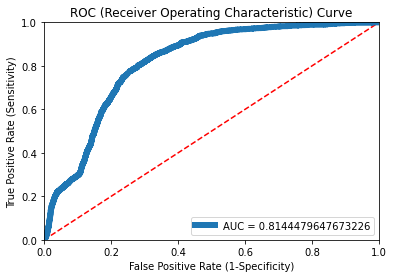

In [241]:
# ROC Curve

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

# Model Comparission:

In [242]:
Accuracy_Comp_df = pd.DataFrame({'Classification Model' : ['LOG-RRG-FULL','LOG-RRG-FULL-smote','Tree','Tree-smote','RandomForest', 'ADABOOST', 
                                            'NAIVE-BAYES', 'KNN'],
                        'Accuracy' : [Logi_accuracy,Logi_accuracy_smote,decci_accuracy,decci_accuracy_smote,rf_accuracy,Ada_accuracy, NB_accuracy, KNN_accuracy]})


In [243]:
Accuracy_Comp_df

,Classification Model,Accuracy
0,LOG-RRG-FULL,0.792444
1,LOG-RRG-FULL-smote,0.756000
2,Tree,0.970444
3,Tree-smote,0.968062
4,RandomForest,0.963731
5,ADABOOST,0.931733
6,NAIVE-BAYES,0.505067
7,KNN,0.948800


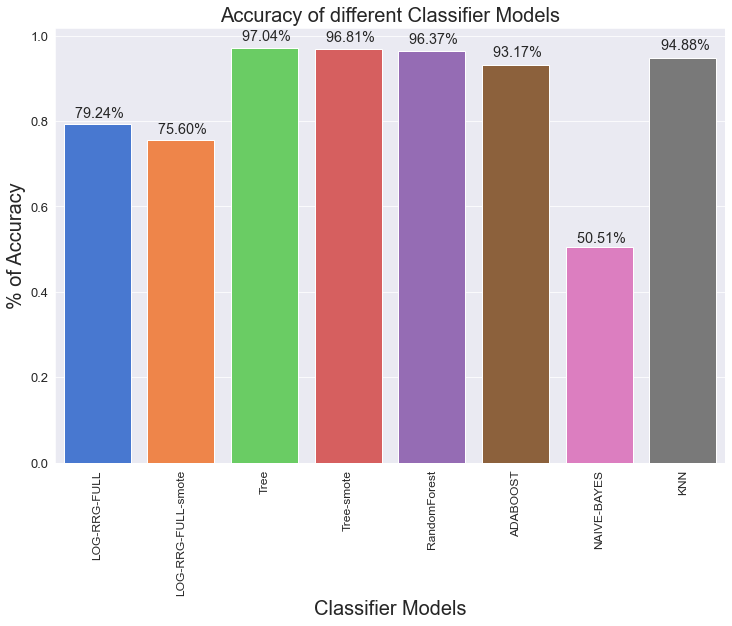

In [244]:
list_acc = [Logi_accuracy,Logi_accuracy_smote,decci_accuracy,decci_accuracy_smote,rf_accuracy,Ada_accuracy, NB_accuracy, KNN_accuracy]
list1 = ['LOG-RRG-FULL','LOG-RRG-FULL-smote','Tree','Tree-smote','RandomForest', 'ADABOOST', 
                                            'NAIVE-BAYES', 'KNN']

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
ax = sns.barplot(x = list1, y = list_acc, palette = 'muted', saturation = 1.5)
plt.xlabel('Classifier Models', fontsize = 20)
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height : .2%}', (x + width/2, y + height*1.02), ha = 'center', fontsize = 'x-large')

plt.show()